In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz ## convert model output to graph format
import pydotplus

ModuleNotFoundError: No module named 'pydotplus'

In [6]:
bankloan=pd.read_csv("C:/Users/Sudeshna Hazra/Documents/Python Scripts/bankloan.csv",na_values='#NULL!')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176.0,9.3,11.36,5.01,1.0
1,27,1,10,6,31.0,17.3,1.36,4.00,0.0
2,40,1,15,14,55.0,5.5,0.86,2.17,0.0
3,41,1,15,14,120.0,2.9,2.66,0.82,0.0
4,24,2,2,0,28.0,17.3,1.79,3.06,1.0


In [7]:
bankloan.shape

(850, 9)

In [24]:
bankloan.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [25]:
bankloan_known=bankloan[~bankloan.default.isnull()]
bankloan_known['default']=bankloan_known['default'].astype('int')
bankloan_unknown=bankloan[bankloan.default.isnull()]

C:\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
bankloan.default.isnull().sum()

150

In [32]:
bankloan.shape

(850, 9)

In [33]:
bankloan_known.shape

(700, 9)

In [34]:
bankloan_unknown.shape

(150, 9)

In [28]:
model_tree=DecisionTreeClassifier(criterion='entropy',max_depth=3)


In [11]:
model_tree.fit(X=bankloan_known.drop('default',axis=1),y=bankloan_known['default'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
model_tree.feature_importances_

array([ 0.        ,  0.        ,  0.29808772,  0.06939914,  0.        ,
        0.45350884,  0.17900429,  0.        ])

In [13]:
dot_data=StringIO()
export_graphviz(model_tree,out_file=dot_data,filled=True,rounded=True,special_characters=True,proportion=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

In [14]:
dot_data.getvalue()

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<X<SUB>5</SUB> &le; 12.45<br/>entropy = 0.829<br/>samples = 100.0%<br/>value = [0.739, 0.261]>, fillcolor="#e58139a5"] ;\n1 [label=<X<SUB>2</SUB> &le; 5.5<br/>entropy = 0.623<br/>samples = 68.1%<br/>value = [0.845, 0.155]>, fillcolor="#e58139d0"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<X<SUB>3</SUB> &le; 6.5<br/>entropy = 0.876<br/>samples = 25.6%<br/>value = [0.704, 0.296]>, fillcolor="#e5813994"] ;\n1 -> 2 ;\n3 [label=<entropy = 0.963<br/>samples = 16.6%<br/>value = [0.612, 0.388]>, fillcolor="#e581395d"] ;\n2 -> 3 ;\n4 [label=<entropy = 0.549<br/>samples = 9.0%<br/>value = [0.873, 0.127]>, fillcolor="#e58139da"] ;\n2 -> 4 ;\n5 [label=<X<SUB>6</SUB> &le; 10.335<br/>entropy = 0.368<br/>samples = 42.6%<br/>value = [0.93, 0.07]>, fillcolor="#e58139ec"] ;\n1 -> 5 ;\n6 [label=<entropy = 0.344<br/>samples = 42.3%<br/>valu

In [33]:
pred_tree_training = model_tree.predict(X = bankloan_known.drop('default',axis=1))

In [34]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score
print(confusion_matrix(pred_tree_training,bankloan_known['default']))
print(cohen_kappa_score(pred_tree_training,bankloan_known['default']))
print(accuracy_score(pred_tree_training,bankloan_known['default']))

[[452  78]
 [ 65 105]]
0.458567719602
0.795714285714


In [35]:
import matplotlib.pyplot as plt

In [36]:
model_tree1=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [37]:
model_tree1.fit(X=bankloan_known.drop('default',axis=1),y=bankloan_known['default'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
model_tree1.feature_importances_

array([ 0.08026236,  0.        ,  0.32461037,  0.        ,  0.        ,
        0.55035696,  0.04477031,  0.        ])

In [22]:
dot_data=StringIO()
export_graphviz(model_tree1,out_file=dot_data,filled=True,rounded=True,special_characters=True,proportion=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'model_tree1' is not defined

In [20]:
from sklearn.metrics import auc, roc_curve, confusion_matrix

In [21]:
tpr, fpr, th = roc_curve(bankloan,pred_tree_training[:,0])

NameError: name 'pred_tree_training' is not defined

In [5]:
from sklearn import naive_bayes

In [19]:
nb_classifier = naive_bayes.GaussianNB()

NameError: name 'naive_bayes' is not defined

In [89]:
nb_classifier.fit(X=bankloan_known.drop('default',axis=1),y=bankloan_known['default'])

GaussianNB(priors=None)

In [90]:
pred_nb = nb_classifier.predict(X = bankloan_known.drop('default',axis=1))

In [91]:
from sklearn import metrics
metrics.confusion_matrix(bankloan_known['default'],pred_nb)

array([[472,  45],
       [126,  57]], dtype=int64)

In [92]:
metrics.accuracy_score(bankloan_known['default'],pred_nb)

0.75571428571428567

In [93]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(pred_hepatitis_nb,bankloan_known['default'])

0.26490456655776362

In [18]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

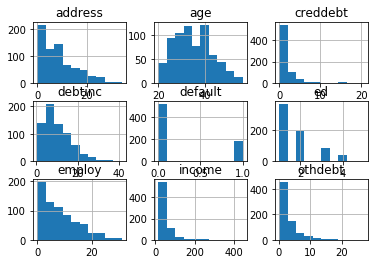

In [22]:
%matplotlib inline
bankloan_known.hist()
plt.show()

Data is highly right skewed

In [23]:
from sklearn import preprocessing

In [24]:
bankloan_known['ed']=bankloan_known['ed'].astype('category')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
bankloan_known['ed'].dtypes

category

In [70]:
bank_num=bankloan_known.drop('ed',axis=1)
bank_num.head()

,age,employ,address,income,debtinc,creddebt,othdebt,default
0,41,17,12,176.0,9.3,11.36,5.01,1
1,27,10,6,31.0,17.3,1.36,4.00,0
2,40,15,14,55.0,5.5,0.86,2.17,0
3,41,15,14,120.0,2.9,2.66,0.82,0
4,24,2,0,28.0,17.3,1.79,3.06,1


In [72]:
bank_cat=bankloan_known[['ed','default']]
print(bank_cat.head())
bank_cat.shape

  ed  default
0  3        1
1  1        0
2  1        0
3  1        0
4  2        1


(700, 2)

In [35]:
nb_classifier.fit(X=bank_num.drop('default',axis=1),y=bank_num['default'])

GaussianNB(priors=None)

In [39]:
Num_pred = nb_classifier.predict_proba(X = bank_num.drop('default',axis=1))

In [40]:
nb_classifier_multinom = naive_bayes.MultinomialNB()
nb_classifier_multinom.fit(X = bank_cat.drop('default',axis=1), y = bank_num['default'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
Cat_pred = nb_classifier_multinom.predict_proba(X = bank_cat.drop('default',axis=1))

In [42]:
tot_probs = np.column_stack((Cat_pred, Num_pred))

In [43]:
nb_classifier.fit(X = tot_probs,y = bank_num['default'])

GaussianNB(priors=None)

In [45]:
final_pred = nb_classifier.predict(X = tot_probs)

In [47]:
metrics.confusion_matrix(bankloan_known['default'],final_pred)

array([[466,  51],
       [119,  64]], dtype=int64)

In [49]:
metrics.accuracy_score(bankloan_known['default'],final_pred)

0.75714285714285712

In [50]:
cohen_kappa_score(final_pred,bankloan_known['default'])

0.28532820851600504

In [51]:
bank_cat_normal=preprocessing.scale(bank_cat)

In [52]:
bank_num_normal=preprocessing.scale(bank_num)

In [54]:
nb_classifier.fit(X=bank_num_normal,y=bank_num['default'])

GaussianNB(priors=None)

In [55]:
Num_pred_normal = nb_classifier.predict_proba(X = bank_num_normal)

In [123]:
##nb_classifier_multinom.fit(X=bank_cat_normal,y=bank_num['default'])

In [131]:
cat_pred_normal = nb_classifier.predict_proba(X = bank_cat_normal)

ValueError: operands could not be broadcast together with shapes (700,2) (9,) 

In [132]:
tot_probs = np.column_stack((cat_pred_normal,Num_pred_normal))

In [105]:
nb_classifier.fit(X = tot_probs,y = bank_num['default'])

GaussianNB(priors=None)

In [106]:
final_pred_normal=nb_classifier.predict(X = tot_probs)

In [107]:
metrics.confusion_matrix(bank_num['default'],final_pred_normal)

array([[517,   0],
       [  0, 183]], dtype=int64)

In [108]:
metrics.accuracy_score(bankloan_known['default'],final_pred_normal)

1.0

In [95]:
bank_normal=preprocessing.scale(bank_num.drop('default',axis=1))
bank_normal=pd.DataFrame(bank_normal)
bank_normal.head()

,0,1,2,3,4,5,6
0,0.768304,1.294313,0.545664,3.544603,-0.140798,4.635137,0.594115
1,-0.983529,0.242201,-0.334101,-0.396908,1.031818,-0.091439,0.286673
2,0.643173,0.993709,0.838919,0.255480,-0.697790,-0.327768,-0.270375
3,0.768304,0.993709,0.838919,2.022364,-1.078890,0.523016,-0.681312
4,-1.358922,-0.960214,-1.213867,-0.478457,1.031818,0.111804,0.000539


In [96]:
nb_classifier.fit(X=bank_normal,y=bankloan_known['default'])

GaussianNB(priors=None)

In [97]:
pred_normal = nb_classifier.predict(X = bank_normal)

In [99]:
metrics.confusion_matrix(bankloan_known['default'],pred_normal)

array([[471,  46],
       [125,  58]], dtype=int64)

In [100]:
metrics.accuracy_score(bankloan_known['default'],pred_normal)

0.75571428571428567

In [101]:
cohen_kappa_score(pred_normal,bankloan_known['default'])

0.26490456655776362

In [109]:
from scipy import stats
from scipy.stats import zscore